> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Miguel Antônio Ribeiro e Silva
* **Matrícula:**  4680

# Aula Prática 06
## Visualização de Dados

**Objetivo:** Entender comandos para explorar dados visualmente por meio de gráficos.
**Pré-requisitos:** Linguagem de programação Python, estatística básica \
**Meta:** Ao final da prática, o aluno será capaz de analisar um conjunto de dados visualmente para ajudar na tomada de decisões.

----

In [1]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

#!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p6/OnlineRetail.xlsx

In [2]:
#### Não altere essa célula!!! ####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Roteiro

## Leitura dos dados
Veja os dados do arquivo `OnlineRetail.xlsx`. 

Note que o arquivo é um Excel. A biblioteca consegue ler e o interpretar da mesma maneira que um CSV, como estamos acostumados.

Note que a função usada é a `read_excel` e não a `read_csv`.

É normal que demore um pouco, pois os arquivos em excel possuem muito mais recursos e dados armazenados do que um simples csv.

In [3]:
df = pd.read_excel('./OnlineRetail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Filtrar quantidades e preços unitários negativos

In [4]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Visualizar os dados

### Gráfico de Pontos (_Scatter Plot_)

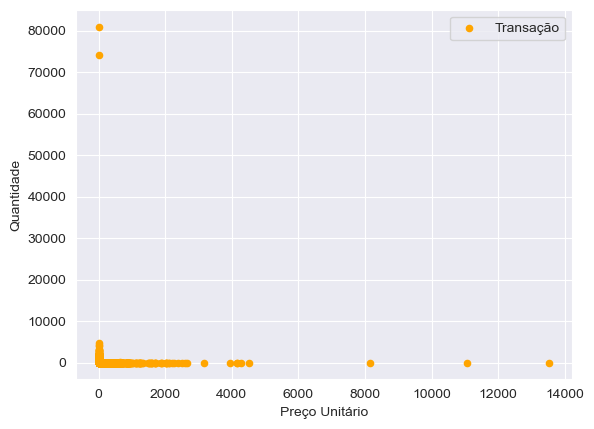

In [5]:
df.plot(kind='scatter', x='UnitPrice', y='Quantity', color='orange', label='Transação')
# Adiciona um rótulo no eixo Y
plt.ylabel('Quantidade')
# Adiciona um rótulo no eixo X
plt.xlabel('Preço Unitário')

plt.show()

### Usar escala logarítmica nos dois eixos para melhorar a visualização
Também vamos gerar um gráfico colorindo e marcando por país

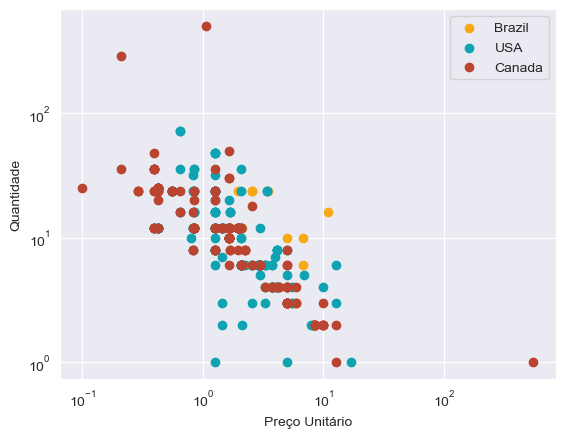

In [6]:
countries_colors = {
    'Brazil': '#FAA916',
    'USA': '#0FA3B1',
    'Canada': '#BB4430'
}

fig, ax = plt.subplots()
countries_data = list(map(lambda k: (k, df[df['Country'] == k]), countries_colors.keys()))
[ax.scatter(x=d['UnitPrice'], y=d['Quantity'], c=countries_colors[k], label=k) for (k, d) in countries_data]

plt.ylabel('Quantidade')
plt.xlabel('Preço Unitário')
plt.xscale('log')
plt.yscale('log')
ax.legend() # Habilita a legenda das cores
plt.show()

### Usar um terceiro atributo para definir o tamanho do marcador

Veja o argumento `s` (de size) da função scatter

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\3532260880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


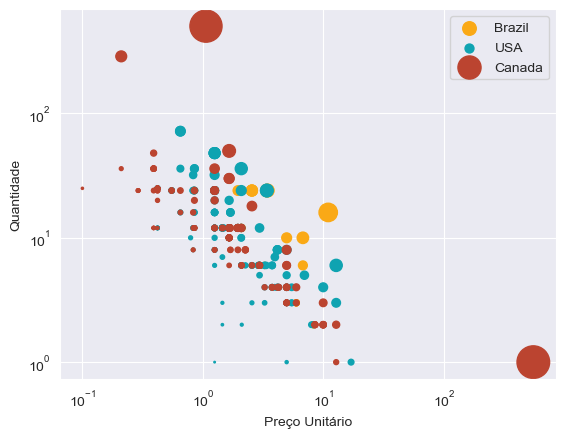

In [7]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

fig, ax = plt.subplots()
countries_data = list(map(lambda k: (k, df[df['Country'] == k]), countries_colors.keys()))
[ax.scatter(x=d['UnitPrice'], y=d['Quantity'], c=countries_colors[k], s=d['TotalPrice'], label=k) for (k, d) in countries_data]

plt.ylabel('Quantidade')
plt.xlabel('Preço Unitário')
plt.xscale('log')
plt.yscale('log')
ax.legend() # Habilita a legenda das cores
plt.show()

### Agrupar antes de exibir os gráficos
Agrupando pelo `InvoiceNo`

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\2340740567.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_invoice.sum().plot.scatter(x='Quantity', y='TotalPrice', c='#EF2D56')


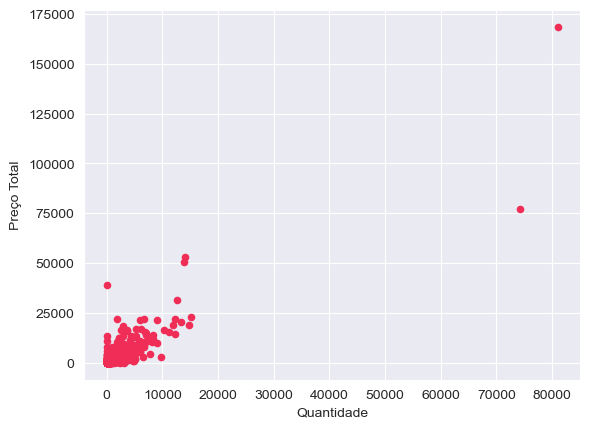

In [8]:
group_invoice = df.groupby('InvoiceNo')

group_invoice.sum().plot.scatter(x='Quantity', y='TotalPrice', c='#EF2D56')
plt.xlabel('Quantidade')
plt.ylabel('Preço Total')
plt.show()

### Gerar o mesmo gráfico anterior na escala logarítmica

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\2117653288.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_invoice.sum().plot.scatter(x='Quantity', y='TotalPrice', c='#EF2D56')


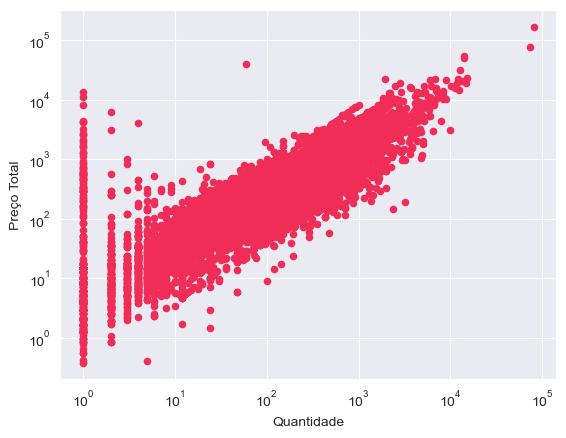

In [9]:
group_invoice = df.groupby('InvoiceNo')

group_invoice.sum().plot.scatter(x='Quantity', y='TotalPrice', c='#EF2D56')
plt.xlabel('Quantidade')
plt.ylabel('Preço Total')
plt.xscale('log')
plt.yscale('log')
plt.show()

### Plotar gráfico de linha para avaliar tendência.
Agrupar as compras por data e mostrar a quantidade de itens por data da compra.

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\1615323299.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_date.sum()['Quantity'].plot(c='#EF2D56')


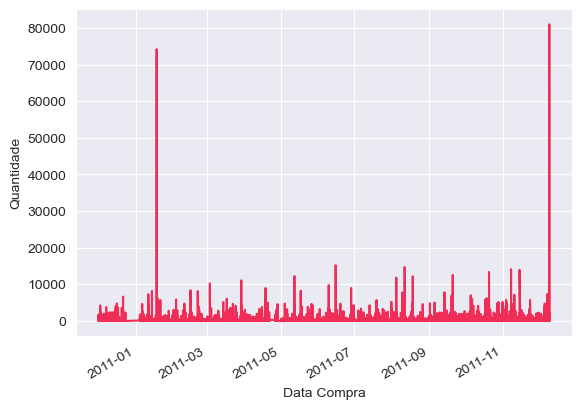

In [10]:
group_date = df.groupby('InvoiceDate')
group_date.sum()['Quantity'].plot(c='#EF2D56')
plt.xlabel('Data Compra')
plt.ylabel('Quantidade')
plt.show()

### Agrupar por Mês/Ano

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\1665172491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MonthYear'] = df['InvoiceDate'].dt.strftime('%m/%Y')
C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\1665172491.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_month_year.sum()['Quantity'].plot(c='#EF2D56')


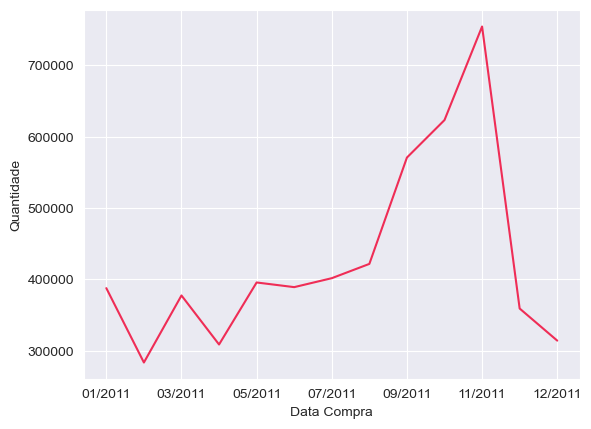

In [11]:
df['MonthYear'] = df['InvoiceDate'].dt.strftime('%m/%Y')

group_month_year = df.groupby('MonthYear')
group_month_year.sum()['Quantity'].plot(c='#EF2D56')
plt.xlabel('Data Compra')
plt.ylabel('Quantidade')
plt.show()

### Plotar gráfico de barras para mostrar valores para atributos categóricos

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\3008313283.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_invoice.sum().iloc[0:9]['Quantity'].plot(kind='bar', color='#EF2D56')


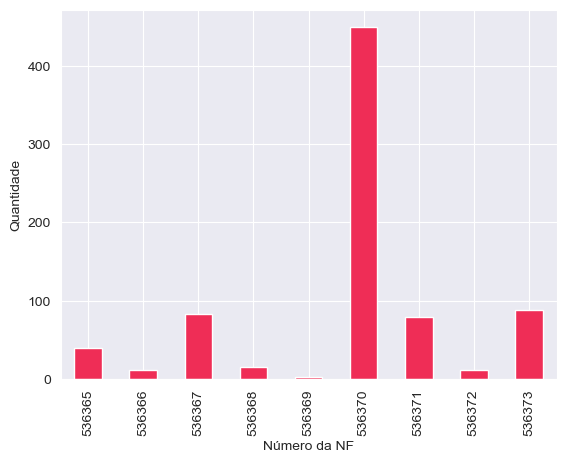

In [12]:
group_invoice.sum().iloc[0:9]['Quantity'].plot(kind='bar', color='#EF2D56')
plt.xlabel('Número da NF')
plt.ylabel('Quantidade')
plt.show()

### Plotar Histograma

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\2466899241.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_invoice.sum()['TotalPrice'].plot(kind='hist', color='#EF2D56')


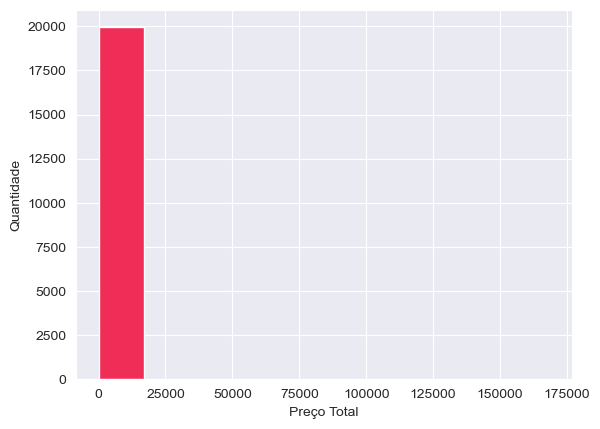

In [13]:
group_invoice.sum()['TotalPrice'].plot(kind='hist', color='#EF2D56')
plt.xlabel('Preço Total')
plt.ylabel('Quantidade')
plt.show()

### Filtrar para visualizar melhor a maioria
O gráfico acima possui uma concentração em valores menores mas possui alguns outliers com preço **muito** superior à maioria. Vamos resolver isso com um filtro.

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\4246264761.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_invoice.sum().loc[group_invoice.sum()['TotalPrice'] < 1000]['TotalPrice'].plot(kind='hist', color='#EF2D56')
C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\4246264761.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_invoice.sum().loc[group_invoice.sum()['TotalPrice'] < 1000]['TotalPrice'].plot(kind='hist', color='#EF2D56')


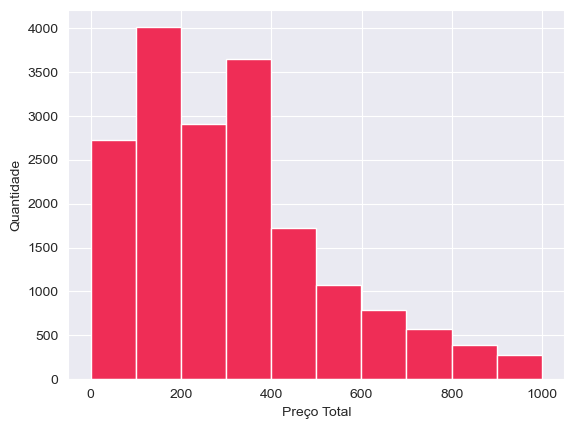

In [14]:
group_invoice.sum().loc[group_invoice.sum()['TotalPrice'] < 1000]['TotalPrice'].plot(kind='hist', color='#EF2D56')
plt.xlabel('Preço Total')
plt.ylabel('Quantidade')
plt.show()

### Alterar número de bins para ter mais detalhes

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\1103155062.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_invoice.sum().loc[group_invoice.sum()['TotalPrice'] < 1000]['TotalPrice'].plot(kind='hist', color='#EF2D56', bins=100)
C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\1103155062.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_invoice.sum().loc[group_invoice.sum()['TotalPrice'] < 1000]['TotalPrice'].plot(kind='hist', color='#EF2D56', bins=100)


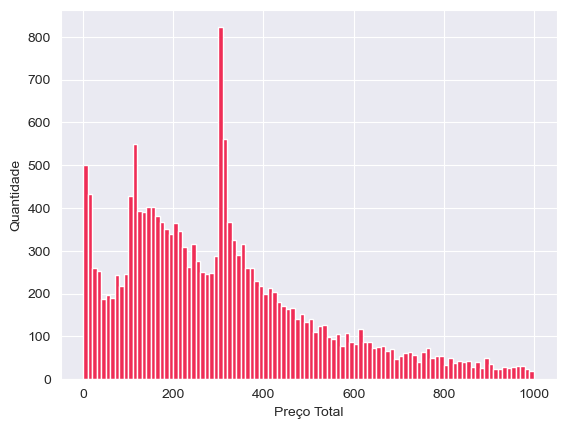

In [15]:
group_invoice.sum().loc[group_invoice.sum()['TotalPrice'] < 1000]['TotalPrice'].plot(kind='hist', color='#EF2D56', bins=100)
plt.xlabel('Preço Total')
plt.ylabel('Quantidade')
plt.show()

### Plotar um BoxPlot

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\2469481393.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_invoice.sum()['TotalPrice'].plot.box(color='#EF2D56')


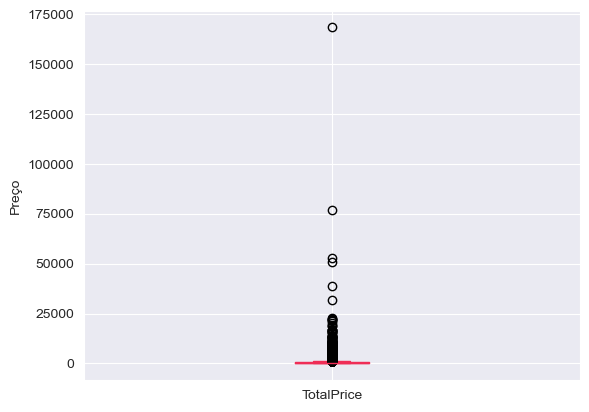

In [16]:
group_invoice.sum()['TotalPrice'].plot.box(color='#EF2D56')
plt.ylabel('Preço')
plt.show()

### Usar escala logarítmica para ver melhor

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\1879542595.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_invoice.sum()['TotalPrice'].plot.box(color='#EF2D56')


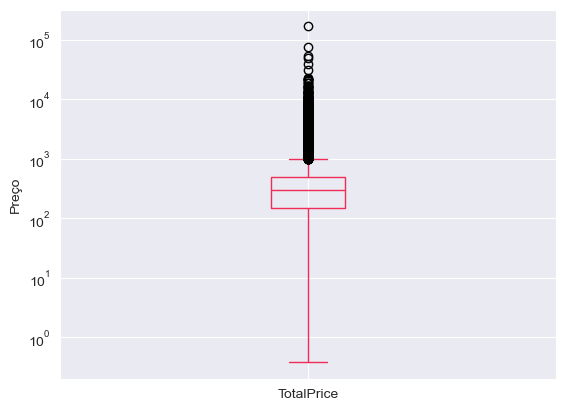

In [17]:
group_invoice.sum()['TotalPrice'].plot.box(color='#EF2D56')
plt.ylabel('Preço')
plt.yscale('log')
plt.show()

### Filtrar para valores menores

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\3262540783.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_invoice.sum().loc[group_invoice.sum()['TotalPrice'] < 1000]['TotalPrice'].plot.box(color='#EF2D56')
C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\3262540783.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_invoice.sum().loc[group_invoice.sum()['TotalPrice'] < 1000]['TotalPrice'].plot.box(color='#EF2D56')


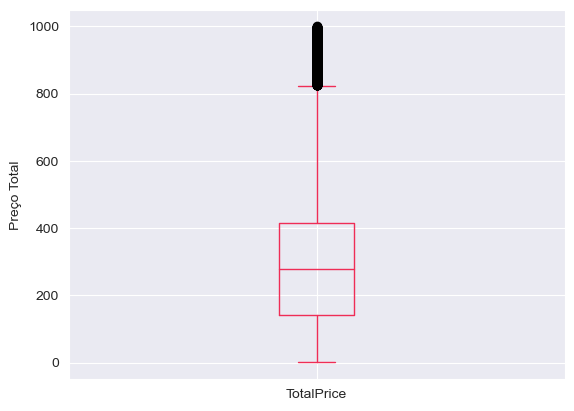

In [18]:
group_invoice.sum().loc[group_invoice.sum()['TotalPrice'] < 1000]['TotalPrice'].plot.box(color='#EF2D56')
plt.ylabel('Preço Total')
plt.show()

### Plotar boxplots agrupados por país

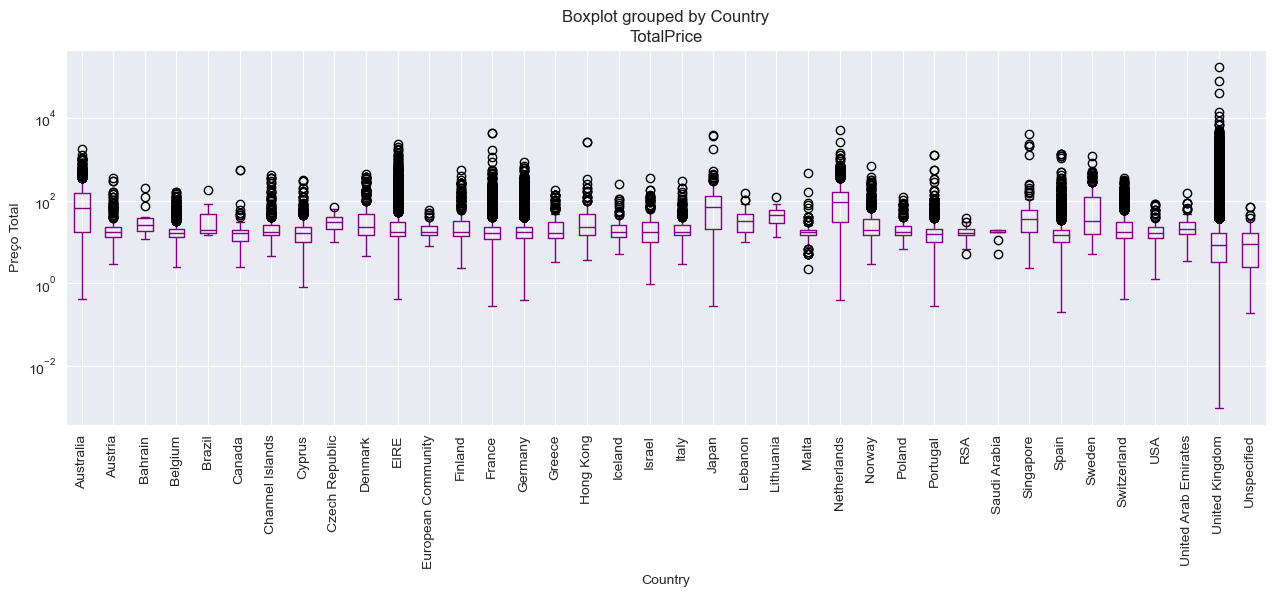

In [19]:
df.boxplot('TotalPrice', by='Country', rot=90, figsize=(15, 5), color='purple')
plt.ylabel('Preço Total')
plt.yscale('log')
plt.show()

# Exercícios

Execute e não remova a célula abaixo antes de iniciar os exercícios. Faça todas as atividades manipulando a variável `df`.

In [20]:
# Atribui o dataframe com o estado "original" em uma variável isolada
original_df = pd.read_excel('./OnlineRetail.xlsx')
df = original_df
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## 1. Faça um gráfico de barras mostrando a quantidade total vendida de cada um dos 10 primeiros produtos que aparecem no Dataframe.
Essa lista não possui correção automática.

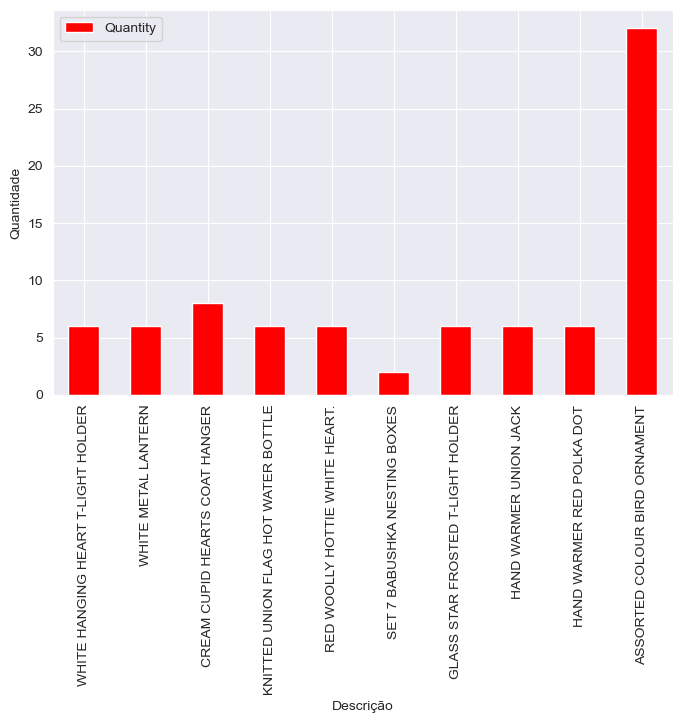

In [21]:
# Resposta da 1
df.head(10).plot.bar(x='Description', y='Quantity', rot=90, figsize=(8, 5), color='red')
plt.ylabel('Quantidade')
plt.xlabel('Descrição')
plt.show()

## 2. Faça um Boxplot dos preços unitários dos produtos. Considere somente os 10 produtos mais vendidos.
Essa lista não possui correção automática.

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\1927235471.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_10 = df.groupby(['StockCode'], as_index=False, sort=False).sum()


<Axes: title={'center': 'UnitPrice'}, xlabel='StockCode'>

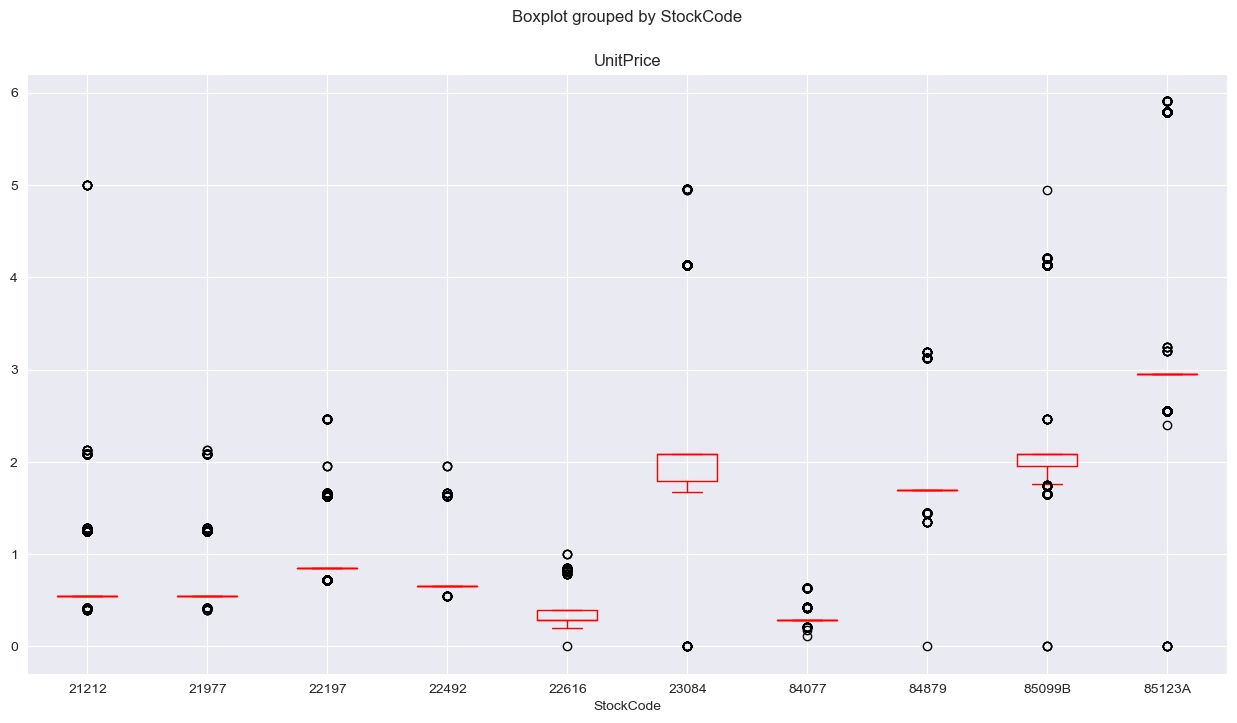

In [22]:
# Resposta da 2.
df_10 = df.groupby(['StockCode'], as_index=False, sort=False).sum()
index = df_10.sort_values('Quantity', ascending=False).head(10).StockCode.values
df[df['StockCode'].isin(index)].boxplot(by='StockCode', column = 'UnitPrice', figsize=(15, 8), color='red')

## 3. Faça um gráfico de linhas mostrando o faturamento (total de preços das vendas) por dia.
Essa lista não possui correção automática.

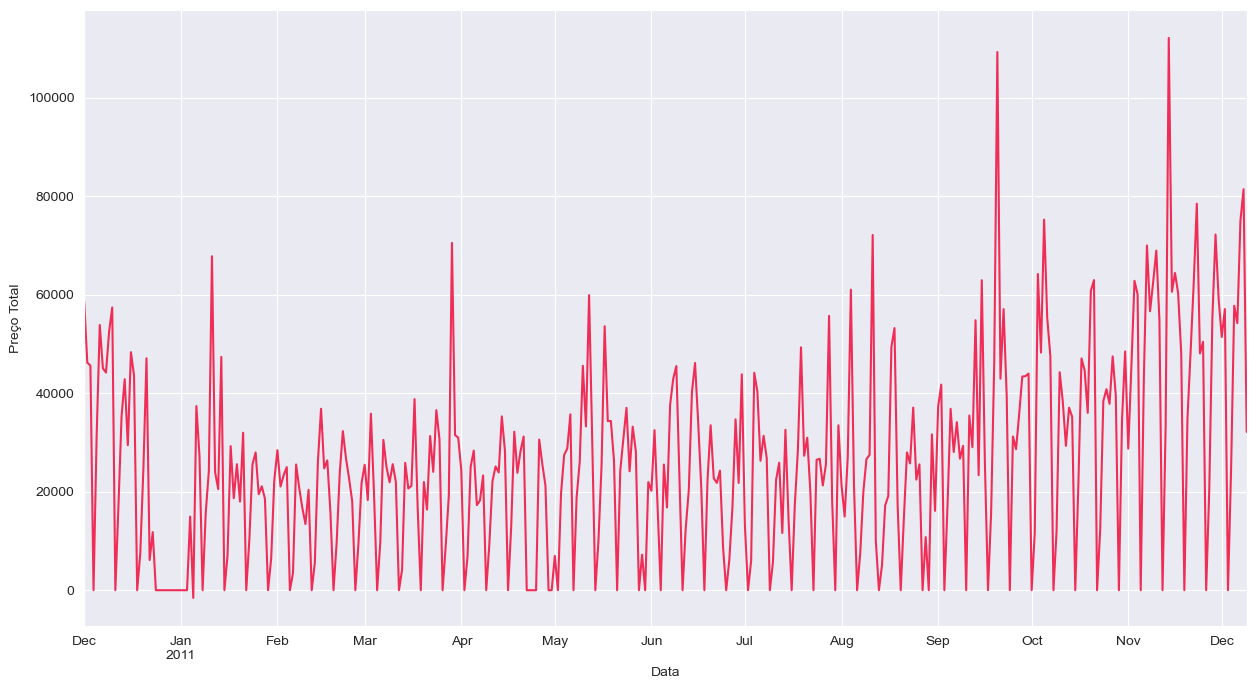

In [23]:
# Resposta da 3.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df_DAY_TOTAL = df.groupby('InvoiceDate')['TotalPrice'].sum() #Agrupando por data e somando o preço total
df_DAY_TOTAL = df_DAY_TOTAL.resample('D').sum() #Agrupando por dia e somando o preço total
df_DAY_TOTAL.plot.line(color='#EF2D56', figsize=(15, 8)) #Plotando o gráfico de linhas
plt.ylabel('Preço Total')
plt.xlabel('Data')
plt.show()

## 4. Faça o histograma da média dos preços unitários dos produtos.
Essa lista não possui correção automática.

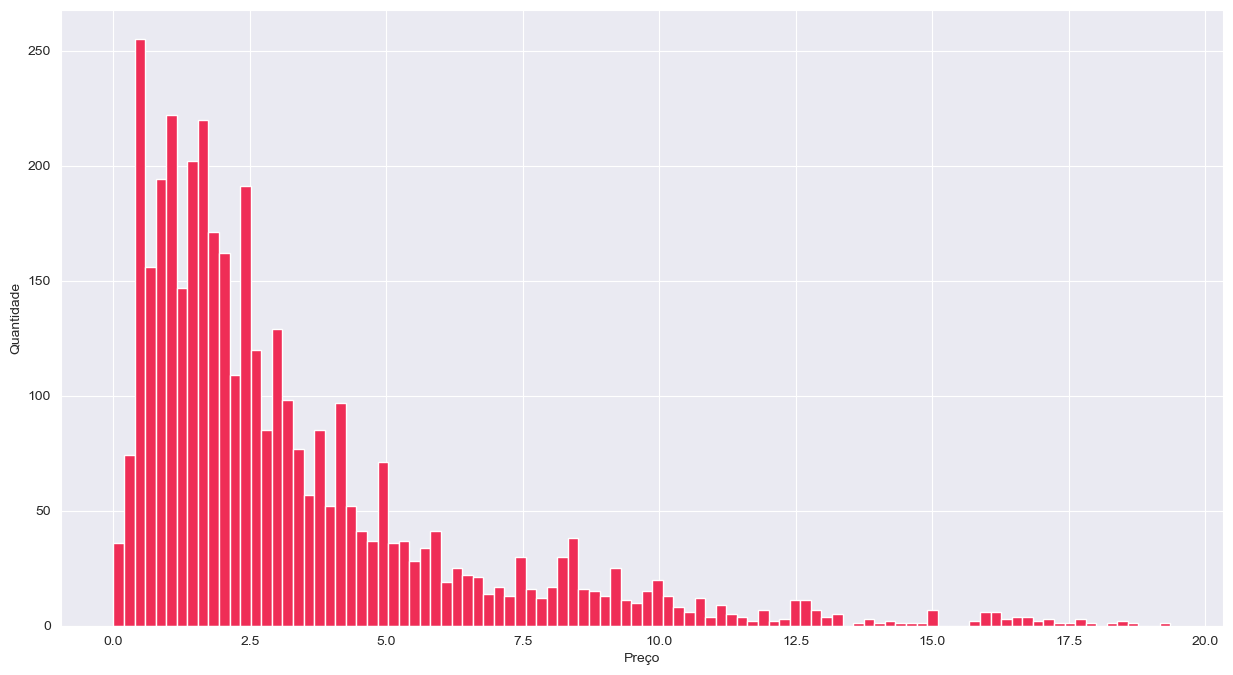

In [24]:
# Resposta da 4.

df_MEAN = df.groupby('StockCode')['UnitPrice'].mean()
df_MEAN = df_MEAN[df_MEAN > 0] #Removendo os valores negativos
df_MEAN = df_MEAN[df_MEAN < 20] #Removendo os valores maiores que 100
df_MEAN.plot.hist(color='#EF2D56', bins=100, figsize=(15, 8)) #Plotando o histograma
plt.xlabel('Preço')
plt.ylabel('Quantidade')
plt.show()


## 5. Faça dois gráficos de barras, sendo um da quantidade de compras e outro do total de faturamento por país.
Essa lista não possui correção automática.

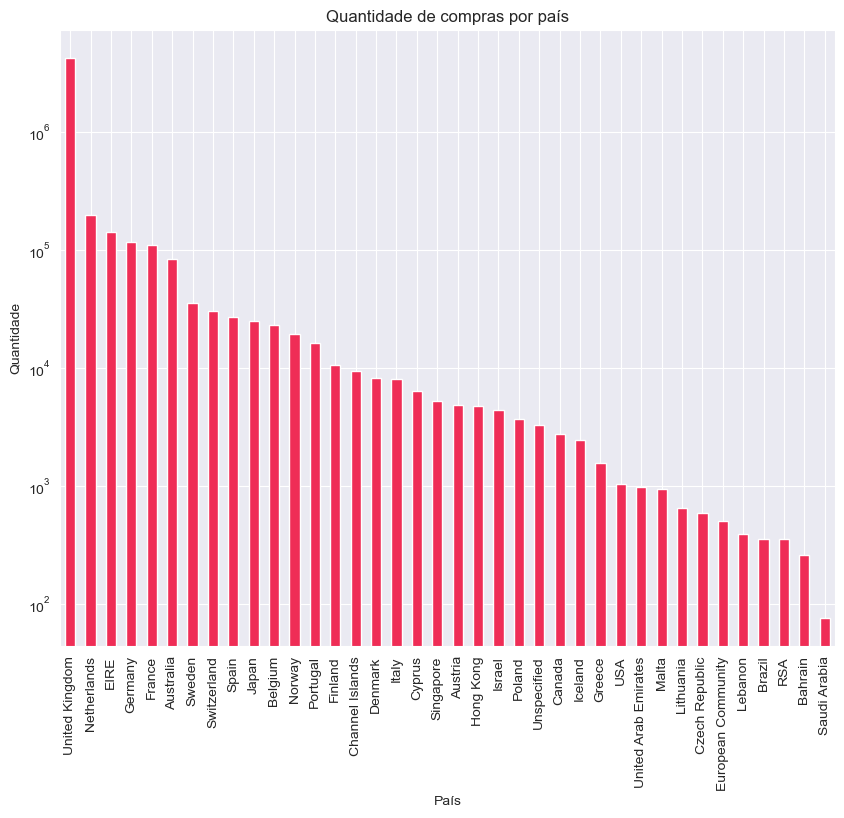

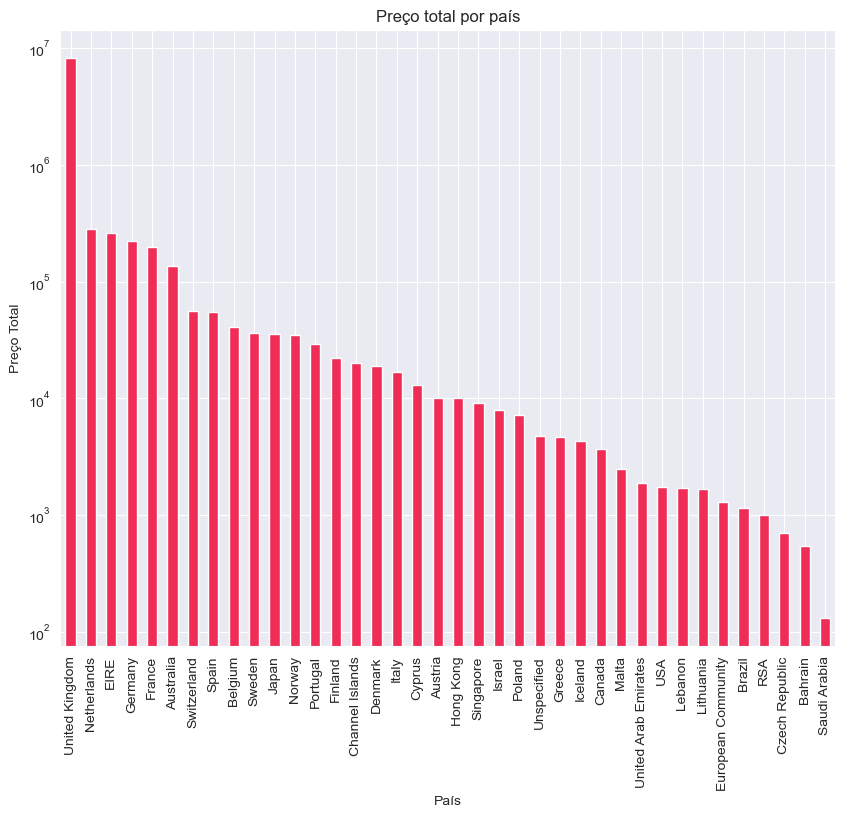

In [25]:
# Resposta da 5.
df_QUANTITY = df.groupby('Country')['Quantity'].sum() #Agrupando por país e somando a quantidade
df_QUANTITY = df_QUANTITY.sort_values(ascending=False) #Ordenando os valores
df_QUANTITY.plot.bar(color='#EF2D56', figsize=(10, 8), xlabel='País', ylabel='Quantidade', title='Quantidade de compras por país') #Plotando o gráfico de barras
plt.yscale('log') #Escala logarítmica
plt.show() #Mostrando o gráfico

df_TOTAL = df.groupby('Country')['TotalPrice'].sum() #Agrupando por país e somando o preço total
df_TOTAL = df_TOTAL.sort_values(ascending=False) #Ordenando os valores
df_TOTAL.plot.bar(color='#EF2D56', figsize=(10, 8), xlabel='País', ylabel='Preço Total', title='Preço total por país') #Plotando o gráfico de barras
plt.yscale('log') #Escala logarítmica
plt.show() #Mostrando o gráfico

## 6. Considerando os 100 produtos mais vendidos, é possível visualizar alguma diferença entre a distribuição dos preços unitários desses produtos ao se comparar os países “Australia” e “United Kingdom”? Faça um ou mais gráficos para ajudar a responder.
Essa lista não possui correção automática.

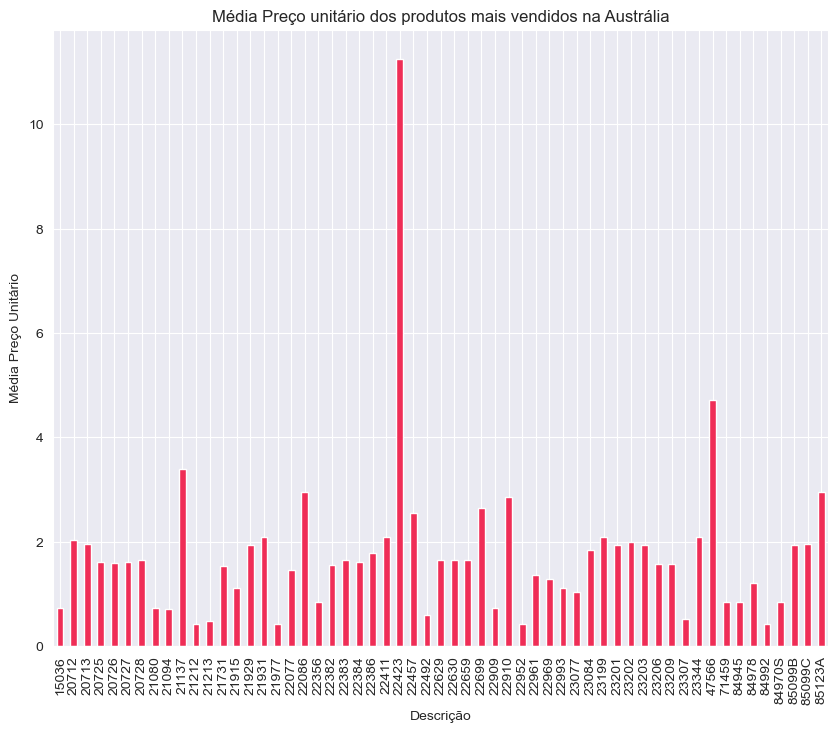

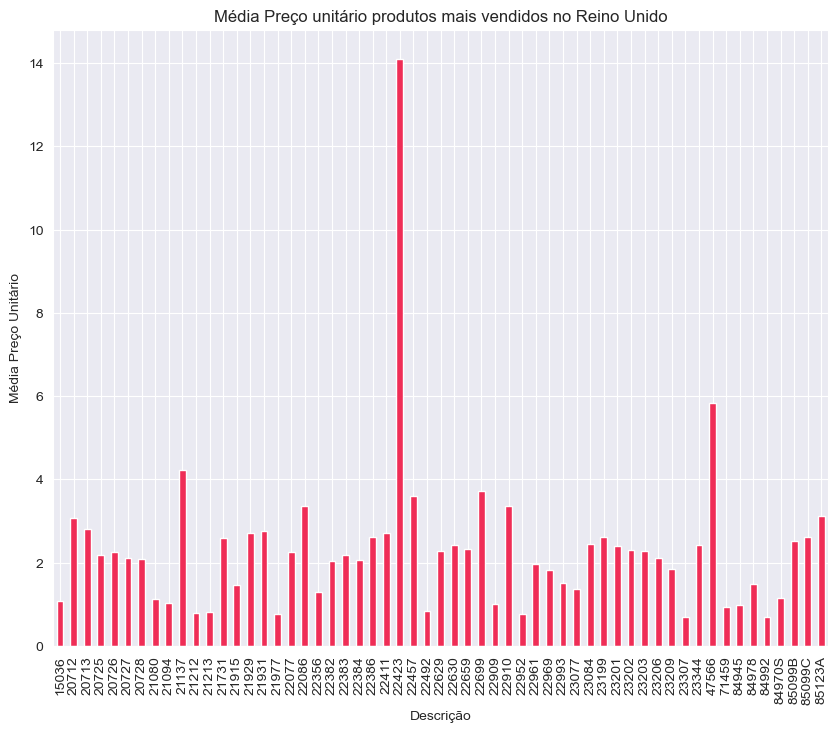

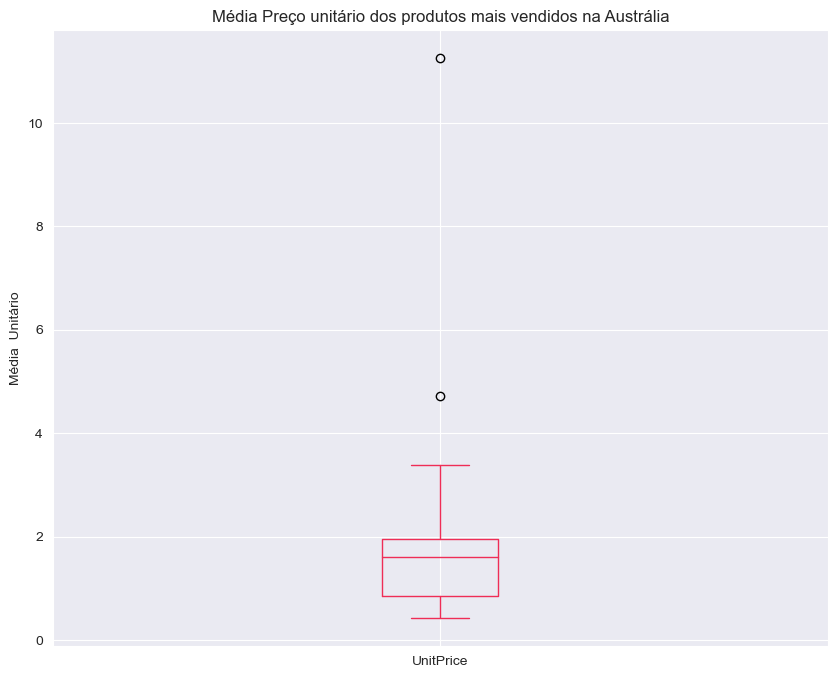

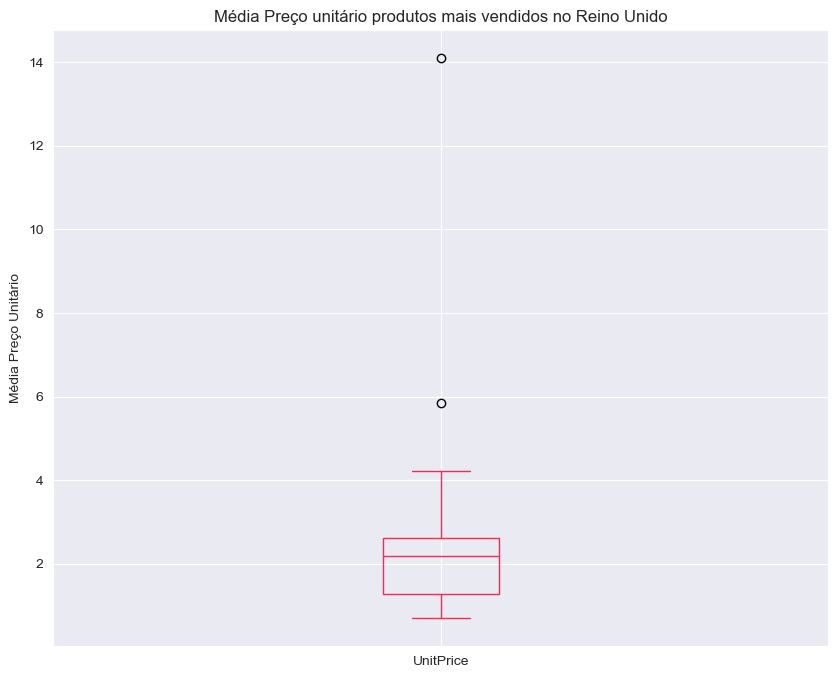

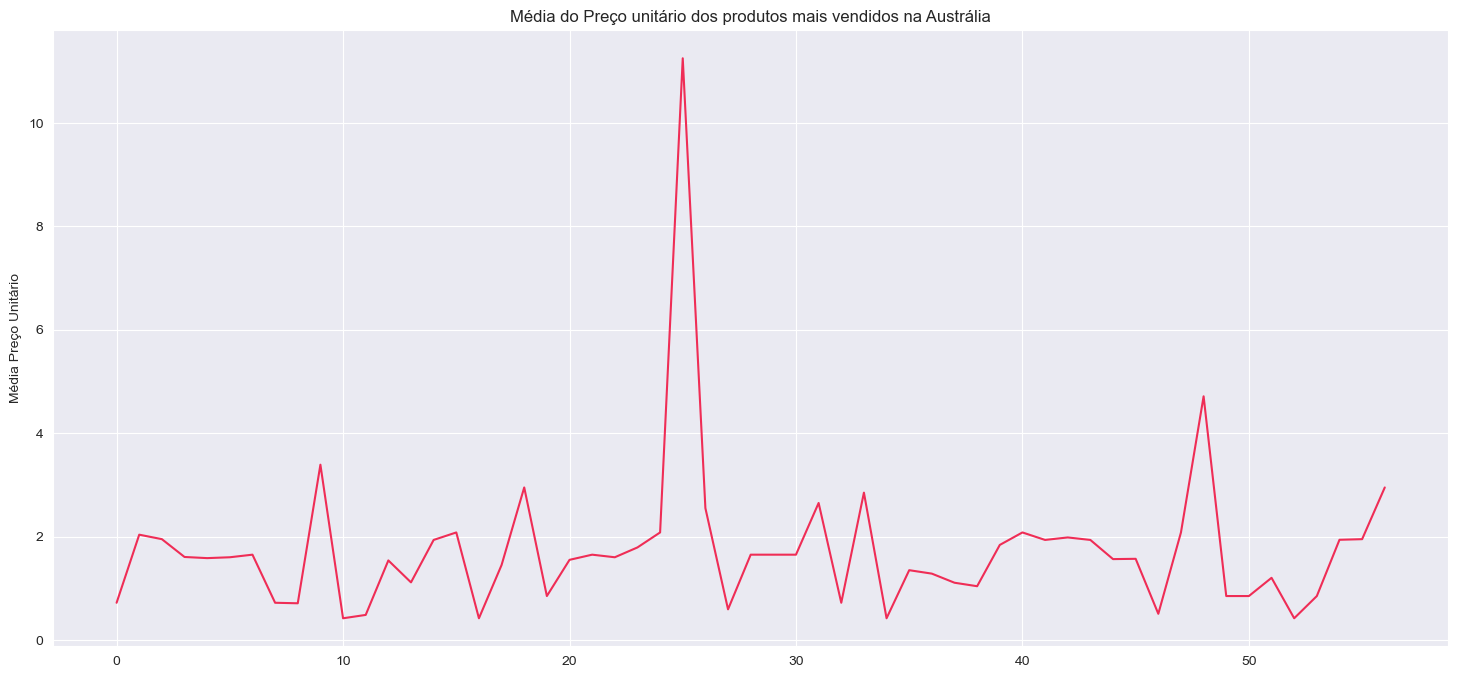

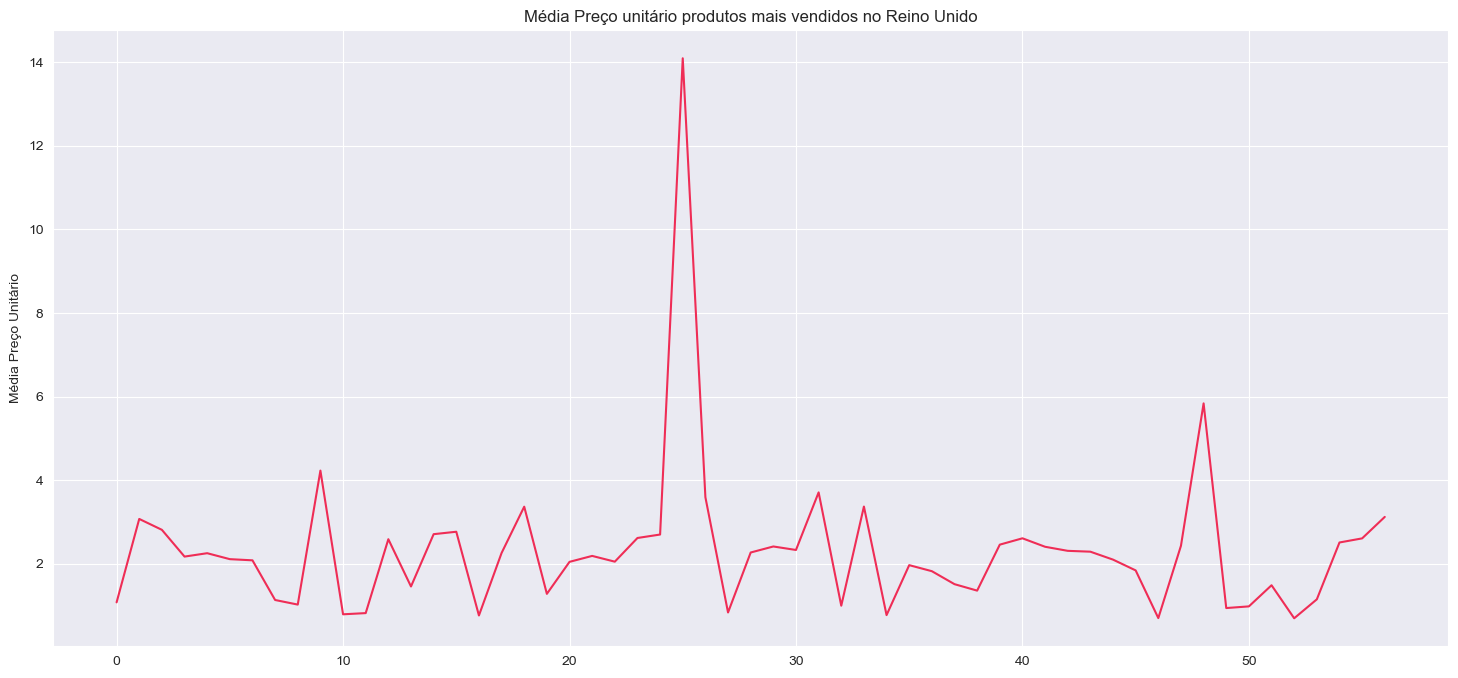

In [26]:
# Resposta da 6.
df_TOP100 = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(100) #Agrupando por StockCode e somando a quantidade

df_TOP100 = df_TOP100.reset_index() #Resetando o index
df_TOP100 = df_TOP100.merge(df, on='StockCode') #Juntando com o dataframe original
df_TOP100 = df_TOP100[df_TOP100['Country'].isin(['Australia', 'United Kingdom'])] #Filtrando os países
df_TOP100 = df_TOP100[df_TOP100['UnitPrice'] > 0] #Removendo os valores negativos

# Preços unitários Australia (StockCode + Média dos Preços)
df_TOP100_AU = df_TOP100[df_TOP100['Country'] == 'Australia'].groupby('StockCode')['UnitPrice'].mean()
# Preços unitários United Kingdom (StockCode + Média dos Preços)
df_TOP100_UK = df_TOP100[df_TOP100['Country'] == 'United Kingdom'].groupby('StockCode')['UnitPrice'].mean()

# Produtos que são comuns entre os dois países
df_TOP100_COMMON = df_TOP100_AU[df_TOP100_AU.index.isin(df_TOP100_UK.index)]

# Excluindo os que não são comuns

df_TOP100_AU = df_TOP100_AU[df_TOP100_AU.index.isin(df_TOP100_COMMON.index)]
df_TOP100_UK = df_TOP100_UK[df_TOP100_UK.index.isin(df_TOP100_COMMON.index)]

# Plotando os gráficos de barras
df_TOP100_AU.plot.bar(color='#EF2D56', figsize=(10, 8), xlabel='Descrição', ylabel='Média Preço Unitário', title='Média Preço unitário dos produtos mais vendidos na Austrália')
plt.show()

df_TOP100_UK.plot.bar(color='#EF2D56', figsize=(10, 8), xlabel='Descrição', ylabel='Média Preço Unitário', title='Média Preço unitário produtos mais vendidos no Reino Unido')
plt.show()

# Plotando o gráfico de boxplot

df_TOP100_AU.plot.box(color='#EF2D56', figsize=(10, 8), ylabel='Média  Unitário', title='Média Preço unitário dos produtos mais vendidos na Austrália')
plt.show()

df_TOP100_UK.plot.box(color='#EF2D56', figsize=(10, 8), ylabel='Média Preço Unitário', title='Média Preço unitário produtos mais vendidos no Reino Unido')


plt.show()

# Plotando o gráfico de linhas

df_TOP100_AU.plot.line(color='#EF2D56', figsize=(18, 8), ylabel='Média Preço Unitário',xlabel = 'Descrição', title='Média do Preço unitário dos produtos mais vendidos na Austrália', use_index=False)
plt.show()

df_TOP100_UK.plot.line(color='#EF2D56', figsize=(18, 8), ylabel='Média Preço Unitário', xlabel = 'Descrição', title='Média Preço unitário produtos mais vendidos no Reino Unido', use_index=False)

plt.show()


## 7. Faça um gráfico de barras, de linhas, histograma e boxplot usando a biblioteca `seaborn`.
Essa lista não possui correção automática.

A biblioteca já está importada pelo nome de `sns`. Vai um gráfico de exemplo abaixo ;)

C:\Users\Miguel\AppData\Local\Temp\ipykernel_14088\1072987176.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_group_sum = df.groupby('Country').sum().reset_index()


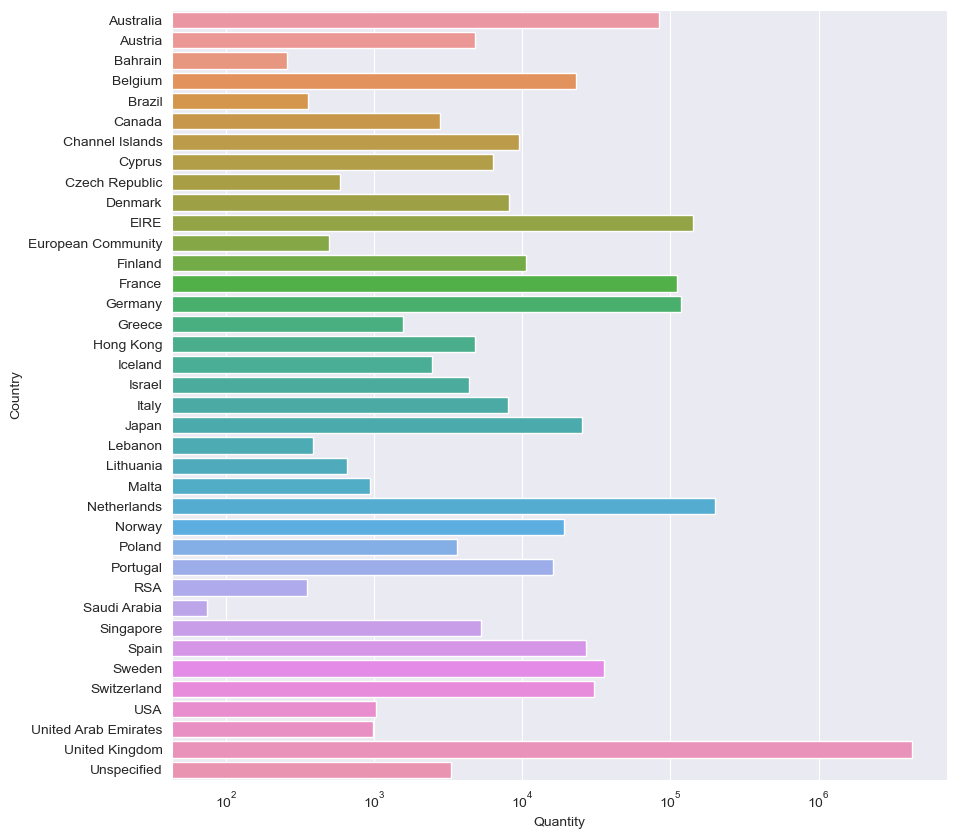

In [27]:
country_group_sum = df.groupby('Country').sum().reset_index()
plt.figure(figsize=(10,10))

g=sns.barplot(data=country_group_sum, y='Country', x='Quantity', orient='h')
g.set_xscale('log')

plt.show()

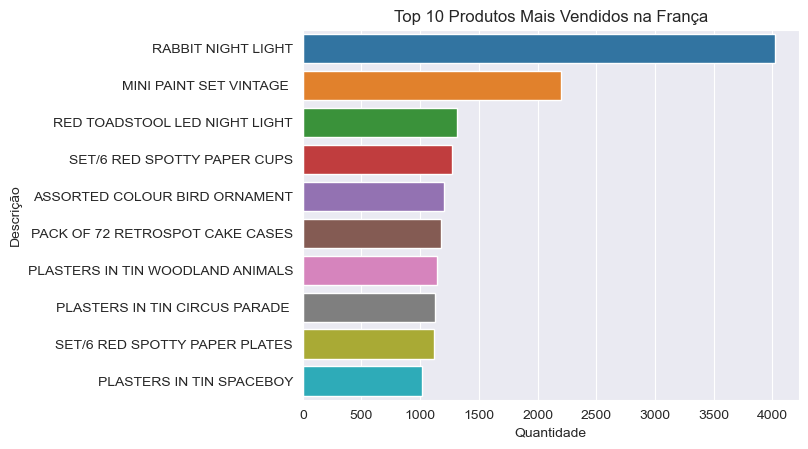

In [28]:
# Faça outro gráfico de barras com o Seaborn aqui

# 10 produtos mais vendidos na França
df_10FRANCE = df[df['Country'] == 'France'].groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Transformar a série em um DataFrame de uma coluna
df_10FRANCE = df_10FRANCE.to_frame()

snsBar = sns.barplot(data=df_10FRANCE, y=df_10FRANCE.index, x='Quantity', orient='h')
snsBar.set(xlabel='Quantidade', ylabel='Descrição', title='Top 10 Produtos Mais Vendidos na França')

# Definir as legendas do eixo X e Y com o Matplotlib
plt.xlabel('Quantidade')
plt.ylabel('Descrição')
plt.show()

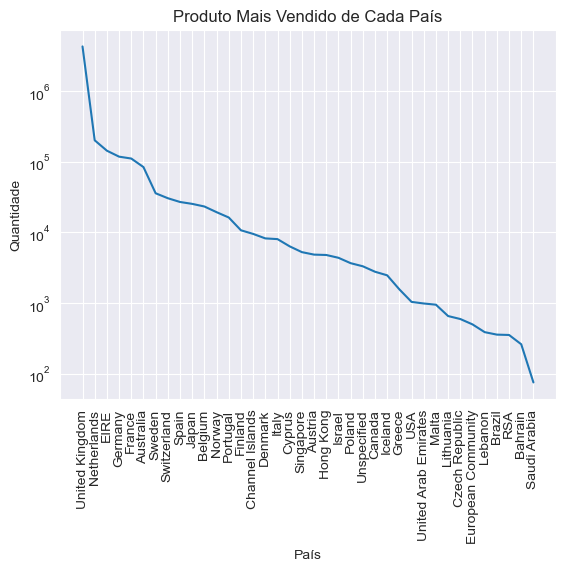

In [29]:
# Faça outro gráfico de linhas com o Seaborn aqui

# Produto mais vendido de cada país x Quantidade
df_1PROD = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).groupby('Country').head(1)

df_1PROD = df_1PROD.to_frame()

# Removendo o Reino Unido

snsLine = sns.lineplot(data=df_1PROD, x=df_1PROD.index, y='Quantity')
snsLine.set(xlabel='País', ylabel='Quantidade', title='Produto Mais Vendido de Cada País')

plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

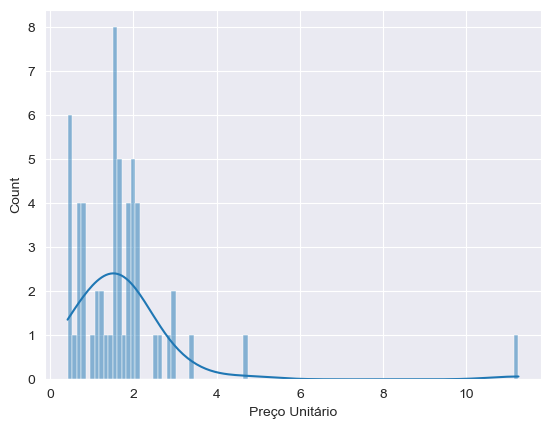

,UnitPrice
StockCode,
15036,0.720000
20712,2.036667
20713,1.950000
20725,1.605556
20726,1.583333
20727,1.600000
20728,1.650000
21080,0.720000
21094,0.710000


In [47]:
# Faça outro gráfico de histograma com o Seaborn aqui

# Preços unitários Australia (Descrição + Média dos Preços)
snsHIST = df_TOP100_COMMON.to_frame()

snsHIST = snsHIST.reset_index()

snsHIST = snsHIST.sort_values(by='UnitPrice', ascending=False)

snsHIST = snsHIST.head(10)

histPLOT = sns.histplot(data=snsHIST, bins=10)

histPLOT.set(xlabel='Descrição', ylabel='Preço Unitário', title='Top 10 Preços Unitários Mais Altos')

plt.xticks(rotation=90)

plt.show()

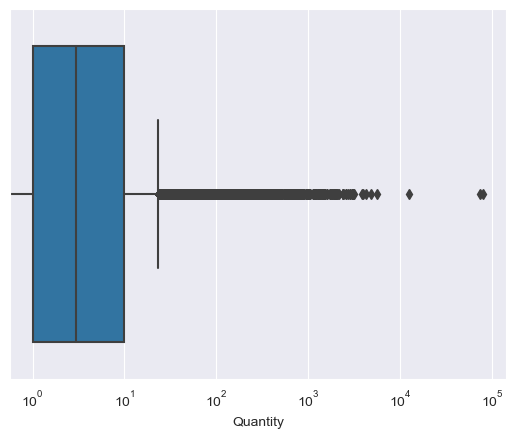

In [31]:
# Faça outro gráfico de boxplot com o Seaborn aqui

# BoxPlot quantidade de vendas
snsBOX = sns.boxplot(data=df, x='Quantity')
plt.xscale('log')
plt.show()

## 7. Faça uma breve análise e comparação dos plots feitos com o `seaborn` e com o `matplotlib`.
Qual você gostou mais? Viu alguma diferença em performance neles? 

Resposta da 7.: Gostei mais do Seaborn. As cores são mais vivas e facilita a visualização, além de que possuem pré- definições de estilos gráficos. O MatPlotLib é muito útil e simples de usar, bem intuitivo e simples. Não notei uma grande diferença de desempenho, mas o Seaborn parece executar em mais tempo.